# Дипломный проект по курсу Data Science

Тема проекта

Он-лайн сервис (чат-бот) для потенциальных клиентов архитектурного бюро. Функционал сервиса включает в себя распознавание стиля дизайна помещений на присланной боту фотографии, а также перенос соответствующего стиля на изображение помещения, которое потенциальный заказчик планирует ремонтировать. 

Проект выполнен: Красницким Б.Р. 

Ментор: Леонид Саночкин

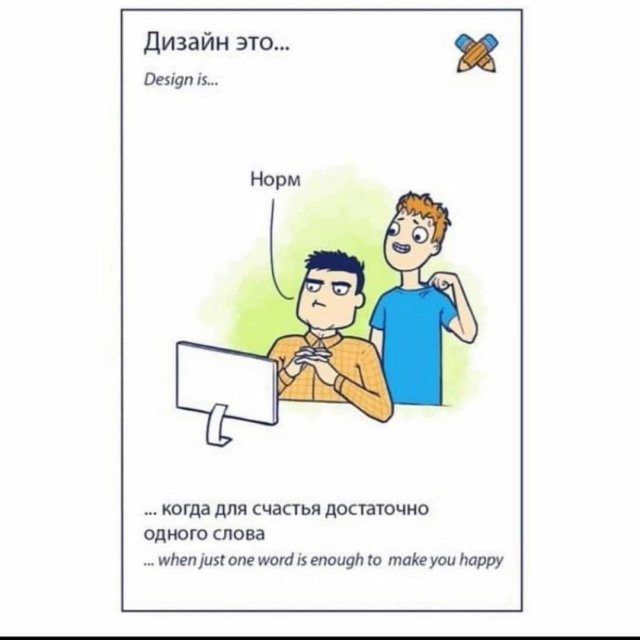

Обоснование темы проекта: Опыт работы моей супруги в сфере дизайна интерьеров показывает, что каждый раз когда кто-то обращается за разработкой дизайн проекта помещения исполнители заказа сталкиваются с тем, что заказчику сложно сформулировать свои потребности (он не может систематизировать и четко донести, что ему хочется). Из-за этого, зачастую, изначальное техническое задание не имеет ничего общего с тем, что получается в конце работы над проектом. Это происходит по разным причинам, в том числе и от незнания стилей и направлений в дизайне. По себе могу сказать, что мысленное представление помещения с измененной планировкой, другими предметами интерьера, цветами и материалами в отделке это проблема. В общем осознавая наличие сложностей на этом этапе (а по сути это этап формирования технического задания) у нас возникла идея попробовать реализовать нечто, что позволило бы помочь потенциальному клиенту сформулировать четкое представление того, что ему необходимо и автоматически сформировать изображение помещения в том стиле, к которому клиент тяготеет. Так в рамках дипломного проекта реализуется сервис который предлагает клиенту найти в интернете 1 картинку (на данном этапе, в будущем планируется реализация алгоритма который позволит обрабатывать 5-10 картинок) с интерьером, который ему нравится, нейросеть распознает присылаемое фото и классифицирует его по соответствующим стилям. Далее клиенту предлагается прислать фотографию помещения которое будет ремонтироваться и уже другая нейросеть стилизует это помещение под то, что нравится клиенту. Данный сервис реализован в формате чат-бота. 

По аналогичному проекту в 2019 году была защищена магистерская диссертация https://github.com/MartiGrau/Changing-style-of-rooms/blob/master/2018TFG_Marti_Grau_vf.pdf

# 1. Подготовка системы и данных

1.1 Загружаем необходимые для работы библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import zipfile
import csv
import sys
import os

import albumentations as A


import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import *
import tensorflow.keras.models as Model
import tensorflow.keras.layers as Layer

from sklearn.model_selection import train_test_split, StratifiedKFold
import cv2
from google.colab.patches import cv2_imshow
import PIL
from PIL import ImageOps, ImageFilter

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import time
import functools

from tensorflow.python.keras.preprocessing import image as kp_image
from tensorflow.python.keras import models 
from tensorflow.python.keras import losses
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as K

import os

import tensorflow as tf

import cProfile


from requests import get

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline


print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)
print('Tensorflow   :', tf.__version__)
print('Keras        :', tf.keras.__version__)

Python       : 3.7.11 (default, Jul  3 2021, 18:01:19) 
Numpy        : 1.19.5
Tensorflow   : 2.6.0
Keras        : 2.6.0


In [ ]:
pip install --upgrade albumentations


     |████████████████████████████████| 98 kB 3.8 MB/s 
     |████████████████████████████████| 37.1 MB 47 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
pip install pyTelegramBotAPI


     |████████████████████████████████| 104 kB 5.5 MB/s 
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.0.0-py3-none-any.whl size=79300 sha256=202d157d65a9f88c8d5598a8c145b85d4e2a47533960145c43d8c11dfb5b95e2
  Stored in directory: /root/.cache/pip/wheels/37/0d/f5/48d55810a3b7ba9d3a17d08fad99547bb19988d0bc24836979
Successfully built pyTelegramBotAPI


In [ ]:
pip install git+https://github.com/mjkvaak/ImageDataAugmentor

  Cloning https://github.com/mjkvaak/ImageDataAugmentor to /tmp/pip-req-build-kfierzx9
  Running command git clone -q https://github.com/mjkvaak/ImageDataAugmentor /tmp/pip-req-build-kfierzx9
     |████████████████████████████████| 49.9 MB 16 kB/s 
  Created wheel for ImageDataAugmentor: filename=ImageDataAugmentor-0.0.0-py3-none-any.whl size=29545 sha256=687c64f64af408d38693eb20be1564659070fb75936b2c8ca99c3617f34cfbab
  Stored in directory: /tmp/pip-ephem-wheel-cache-ilx5ai3h/wheels/c9/bd/73/9cfa59d2393dae55bbcc30f5aa901f55fe531c66efebbc8fc3
Successfully built ImageDataAugmentor
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
from ImageDataAugmentor.image_data_augmentor import *
import telebot

In [ ]:
pip install opencv-contrib-python

In [ ]:
# В setup выносим основные настройки: так удобнее их перебирать в дальнейшем.

EPOCHS               = 10 # эпох на обучение
BATCH_SIZE           = 16 # уменьшаем batch если сеть большая, иначе не влезет в память на GPU
LR                   = 1e-3
VAL_SPLIT            = 0.15 # сколько данных выделяем на тест = 10%

CLASS_NUM            = 3  # количество классов в нашей задаче
IMG_SIZE             = 512 # какого размера подаем изображения в сеть
IMG_CHANNELS         = 3   # у RGB 3 канала
input_shape          = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS)



In [ ]:
# Устаналиваем конкретное значение random seed для воспроизводимости

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  
PYTHONHASHSEED = 0

In [ ]:
# вход в гугл диск
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


1.2 Импорт и обзор данных

Пара слов о том каким образом был осуществлен сбор данных для реализации проекта.
Во-первых был опробован Python-модуль для парсинга фото с Яндекс.Картинок, находящийся в открытом доступе по ссылке https://github.com/Ulbwaa/YandexImagesParser. Однако, ввиду того, что не все картинки, которые выдает Яндекс по запросу "дизайн в ... стиле" в действительности ему соответствуют пришлось много фотографий собирать "руками". В итоге в наличии около 1,5 тыс. фотографий интерьера в стиле "лофт", "скандинавский" и "эклектика". Забегая вперед можно сказать, что "эклектику" я выбрал зря, но на момент начала работы над проектом выбор казался аргументированным в связи с тем, что все три стиля значительно отличаются друг от друга и это казалось преимуществом. 

In [ ]:
#Зададим путь
DATA_DIR = '/content/gdrive/My Drive/sf-dl-car-classification/train1/train/'

#Определим датасеты из нужных файлов
train = pd.read_excel(DATA_DIR + 'train.xlsx')


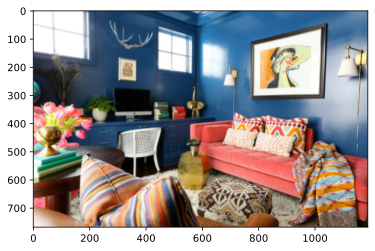

(1188, 768)

In [ ]:
# Пример изображения
PATH = '/content/gdrive/My Drive/sf-dl-car-classification/train1/train/0/'
image = PIL.Image.open(PATH+'stil-eklektika-v-interere_5d4327084b1e5.jpg')
imgplot = plt.imshow(image)
plt.show()
image.size

Изображение довольно большого размера

Пример картинок


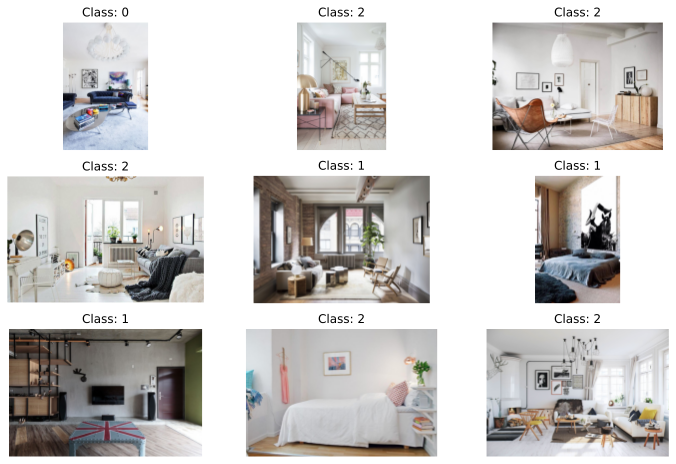

In [ ]:
# Примеры из разных классов
print('Пример картинок')
plt.figure(figsize=(12,8))

random_image = train.sample(n=9)
random_image_paths = random_image['Id'].values
random_image_cat = random_image['Category'].values

for index, path in enumerate(random_image_paths):
    im = PIL.Image.open('/content/gdrive/My Drive/sf-dl-car-classification/train1'+f'/train/{random_image_cat[index]}/{path}')
    plt.subplot(3,3, index+1)
    plt.imshow(im)
    plt.title('Class: '+str(random_image_cat[index]))
    plt.axis('off')
plt.show()

Все картинки разного размера. 

In [ ]:
# Подготовка набора аугментации изображений
AUGMENTATIONS = A.Compose([
        #A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        #A.Resize(400, 400),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.PiecewiseAffine (p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.Sharpen (),
            A.Emboss (),
            A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1),contrast_limit=(-0.1, 0.1), p=0.5)
                        
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])


''' A.Solarize() 
A.RandomToneCurve ()
A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    #A.augmentations.transforms.ColorJitter(brightness=0.10, contrast=0.2, saturation=0.2, hue=0.00, always_apply=False, p=0.5),
    A.ShiftScaleRotate(p=0.5),
    A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), p=0.5),
    A.augmentations.transforms.RGBShift (r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, always_apply=False, p=0.5),
    A.augmentations.transforms.ChannelDropout (channel_drop_range=(1, 1), fill_value=0, always_apply=False, p=0.5),
    
    A.augmentations.transforms.GridDistortion (num_steps=5, distort_limit=0.3, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
    A.CoarseDropout(p=0.5),
    A.Cutout(p=0.5),'''

' A.Solarize() \nA.RandomToneCurve ()\nA.Transpose(p=0.5),\n    A.VerticalFlip(p=0.5),\n    #A.augmentations.transforms.ColorJitter(brightness=0.10, contrast=0.2, saturation=0.2, hue=0.00, always_apply=False, p=0.5),\n    A.ShiftScaleRotate(p=0.5),\n    A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5),\n    A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), p=0.5),\n    A.augmentations.transforms.RGBShift (r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, always_apply=False, p=0.5),\n    A.augmentations.transforms.ChannelDropout (channel_drop_range=(1, 1), fill_value=0, always_apply=False, p=0.5),\n    \n    A.augmentations.transforms.GridDistortion (num_steps=5, distort_limit=0.3, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),\n    A.CoarseDropout(p=0.5),\n    A.Cutout(p=0.5),'

В процессе работы над проектом были использованы разные библиотеки и наборы аугментаций. Итоговый набор оказался самым скромным по набору методов и показал наибольшее значение метрики Accuracy (см. дальше)

1.3. Генерация данных

In [ ]:
# генерация данных

PATH = '/content/gdrive/My Drive/sf-dl-car-classification/train1/train/'


train_gen = ImageDataAugmentor(rescale=1./255,
                        augment=AUGMENTATIONS, 
                        seed=RANDOM_SEED,
                        validation_split=VAL_SPLIT
                       )

train_datagen =train_gen.flow_from_directory(PATH, 
                                            class_mode='categorical', 
                                            batch_size=BATCH_SIZE, 
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            shuffle=True,
                                            subset='training'
                                           )
test_datagen = train_gen.flow_from_directory(PATH, 
                                             class_mode='categorical', 
                                             batch_size=BATCH_SIZE, 
                                             target_size=(IMG_SIZE, IMG_SIZE),
                                             shuffle=True,
                                             subset='validation'
                                            )

Found 1190 images belonging to 3 classes.
Found 208 images belonging to 3 classes.


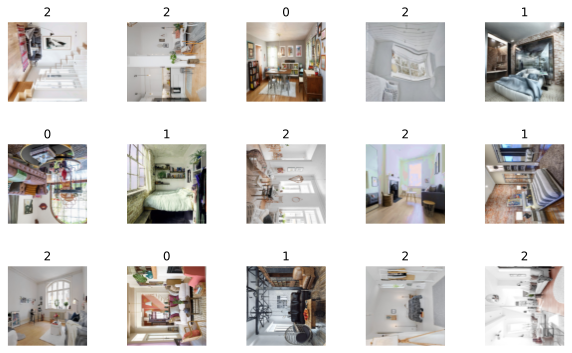

In [ ]:
train_datagen.show_data(rows=3, cols=5)# пример аугментированных изображений

1.4. Подготовка модели и ее обучение

Пробовал различные варианты архитектур сетей

In [ ]:
#base_model = Xception(weights='imagenet', 
 #                     include_top=False, 
#                      input_shape = input_shape)

In [ ]:
#base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape = input_shape)
#base_model = tf.keras.applications.EfficientNetB4(weights='imagenet', include_top=False, input_shape = input_shape) 

base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape = input_shape)


In [ ]:
# обучение сети будем осуществлять на нескольких фолдах

from sklearn.model_selection import KFold, StratifiedKFold
colnames=['Id', 'Category'] 
train1 = pd.read_excel(DATA_DIR + 'train.xlsx',dtype=str, names = colnames)

Y = train1['Category']

kf = KFold(n_splits = 5, shuffle=True)
                         
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True) 

In [ ]:
# функция помогает сохранять веса обученной сети
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [ ]:
idg = ImageDataGenerator(width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.3,
                         fill_mode='nearest',
                         horizontal_flip = True,
                         rescale=1./255)

In [ ]:
base_model.trainable = True # указываем, что нам нужно переобучить выбранную нами модель

В рамках проекта принято решение оценивать качество модели с помощью интуитивно понятной и очевидной метрики accuracy — доля правильных ответов алгоритма. Полагаю, что в нашем случае, когда классы более-менее сбалансированы это оправдано.

Found 1117 validated image filenames belonging to 3 classes.
Found 280 validated image filenames belonging to 3 classes.
Epoch 1/30
 8/35 [=====>........................] - ETA: 54s - loss: 1.1196 - accuracy: 0.4023

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


35/35 [==============================] - 87s 2s/step - loss: 0.8084 - accuracy: 0.6267 - val_loss: 0.5676 - val_accuracy: 0.8286

Epoch 00001: val_accuracy improved from -inf to 0.82857, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train1/model_1.h5
Epoch 2/30
35/35 [==============================] - 85s 2s/step - loss: 0.3785 - accuracy: 0.8720 - val_loss: 0.3674 - val_accuracy: 0.8821

Epoch 00002: val_accuracy improved from 0.82857 to 0.88214, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train1/model_1.h5
Epoch 3/30
35/35 [==============================] - 85s 2s/step - loss: 0.3347 - accuracy: 0.8953 - val_loss: 0.3723 - val_accuracy: 0.8821

Epoch 00003: val_accuracy did not improve from 0.88214
Epoch 4/30
35/35 [==============================] - 84s 2s/step - loss: 0.2951 - accuracy: 0.8979 - val_loss: 0.2925 - val_accuracy: 0.9214

Epoch 00004: val_accuracy improved from 0.88214 to 0.92143, saving model to /content/gdrive/My Drive/sf-dl-

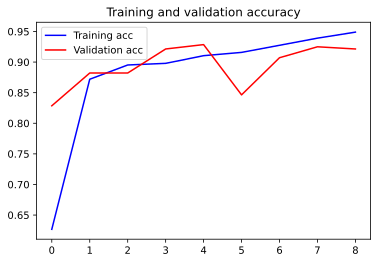

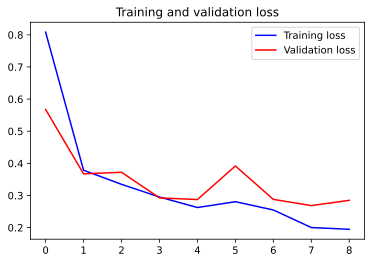

9/9 [==============================] - 13s 1s/step - loss: 0.2859 - accuracy: 0.9071
Found 1117 validated image filenames belonging to 3 classes.
Found 280 validated image filenames belonging to 3 classes.
Epoch 1/30
35/35 [==============================] - ETA: 0s - loss: 0.5299 - accuracy: 0.7968

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


35/35 [==============================] - 88s 2s/step - loss: 0.5299 - accuracy: 0.7968 - val_loss: 0.4382 - val_accuracy: 0.8357

Epoch 00001: val_accuracy improved from -inf to 0.83571, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train1/model_2.h5
Epoch 2/30
35/35 [==============================] - 86s 2s/step - loss: 0.3050 - accuracy: 0.9051 - val_loss: 0.3473 - val_accuracy: 0.8786

Epoch 00002: val_accuracy improved from 0.83571 to 0.87857, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train1/model_2.h5
Epoch 3/30
35/35 [==============================] - 86s 2s/step - loss: 0.2725 - accuracy: 0.9185 - val_loss: 0.3181 - val_accuracy: 0.8821

Epoch 00003: val_accuracy improved from 0.87857 to 0.88214, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train1/model_2.h5
Epoch 4/30
35/35 [==============================] - 86s 2s/step - loss: 0.2781 - accuracy: 0.9096 - val_loss: 0.3231 - val_accuracy: 0.8821

Epoch 00004: val_a

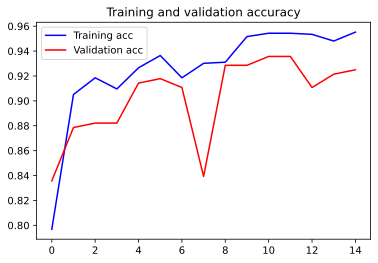

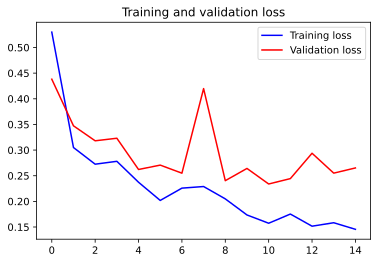

9/9 [==============================] - 13s 1s/step - loss: 0.2405 - accuracy: 0.9429
Found 1118 validated image filenames belonging to 3 classes.
Found 279 validated image filenames belonging to 3 classes.
Epoch 1/30
27/35 [======================>.......] - ETA: 22s - loss: 0.5326 - accuracy: 0.7947

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


35/35 [==============================] - 122s 3s/step - loss: 0.4606 - accuracy: 0.8229 - val_loss: 0.2326 - val_accuracy: 0.9283

Epoch 00001: val_accuracy improved from -inf to 0.92832, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train1/model_3.h5
Epoch 2/30
35/35 [==============================] - 83s 2s/step - loss: 0.2529 - accuracy: 0.9275 - val_loss: 0.2602 - val_accuracy: 0.9247

Epoch 00002: val_accuracy did not improve from 0.92832
Epoch 3/30
35/35 [==============================] - 83s 2s/step - loss: 0.2562 - accuracy: 0.9204 - val_loss: 0.1860 - val_accuracy: 0.9319

Epoch 00003: val_accuracy improved from 0.92832 to 0.93190, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train1/model_3.h5
Epoch 4/30
35/35 [==============================] - 84s 2s/step - loss: 0.2093 - accuracy: 0.9428 - val_loss: 0.1867 - val_accuracy: 0.9319

Epoch 00004: val_accuracy did not improve from 0.93190
Epoch 5/30
35/35 [==============================] -

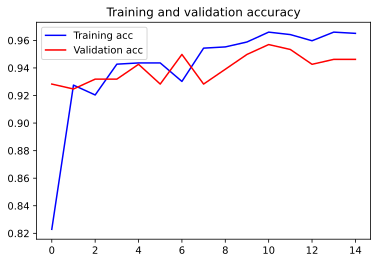

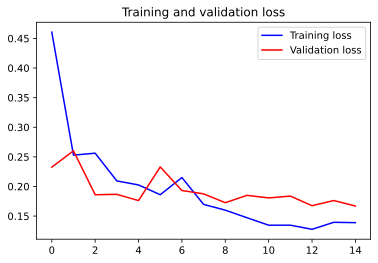

9/9 [==============================] - 13s 1s/step - loss: 0.1898 - accuracy: 0.9355
Found 1118 validated image filenames belonging to 3 classes.
Found 279 validated image filenames belonging to 3 classes.
Epoch 1/30
 5/35 [===>..........................] - ETA: 58s - loss: 0.9898 - accuracy: 0.5063 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


35/35 [==============================] - 85s 2s/step - loss: 0.5374 - accuracy: 0.7916 - val_loss: 0.1393 - val_accuracy: 0.9570

Epoch 00001: val_accuracy improved from -inf to 0.95699, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train1/model_4.h5
Epoch 2/30
35/35 [==============================] - 83s 2s/step - loss: 0.2706 - accuracy: 0.9132 - val_loss: 0.1670 - val_accuracy: 0.9427

Epoch 00002: val_accuracy did not improve from 0.95699
Epoch 3/30
35/35 [==============================] - 83s 2s/step - loss: 0.2286 - accuracy: 0.9275 - val_loss: 0.1271 - val_accuracy: 0.9642

Epoch 00003: val_accuracy improved from 0.95699 to 0.96416, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train1/model_4.h5
Epoch 4/30
35/35 [==============================] - 84s 2s/step - loss: 0.2176 - accuracy: 0.9374 - val_loss: 0.1235 - val_accuracy: 0.9677

Epoch 00004: val_accuracy improved from 0.96416 to 0.96774, saving model to /content/gdrive/My Drive/sf-dl-

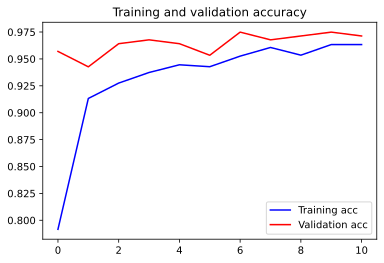

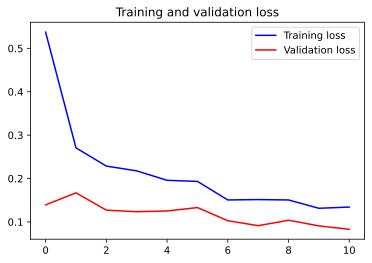

9/9 [==============================] - 13s 1s/step - loss: 0.0962 - accuracy: 0.9713
Found 1118 validated image filenames belonging to 3 classes.
Found 279 validated image filenames belonging to 3 classes.
Epoch 1/30
26/35 [=====================>........] - ETA: 17s - loss: 0.7134 - accuracy: 0.6843

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


35/35 [==============================] - 86s 2s/step - loss: 0.5859 - accuracy: 0.7478 - val_loss: 0.1756 - val_accuracy: 0.9570

Epoch 00001: val_accuracy improved from -inf to 0.95699, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train1/model_5.h5
Epoch 2/30
35/35 [==============================] - 84s 2s/step - loss: 0.2332 - accuracy: 0.9258 - val_loss: 0.2207 - val_accuracy: 0.9391

Epoch 00002: val_accuracy did not improve from 0.95699
Epoch 3/30
35/35 [==============================] - 83s 2s/step - loss: 0.2056 - accuracy: 0.9347 - val_loss: 0.2009 - val_accuracy: 0.9498

Epoch 00003: val_accuracy did not improve from 0.95699

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1e-06.
Epoch 4/30
35/35 [==============================] - 83s 2s/step - loss: 0.1504 - accuracy: 0.9535 - val_loss: 0.1598 - val_accuracy: 0.9642

Epoch 00004: val_accuracy improved from 0.95699 to 0.96416, saving model to /content/gdrive/My Drive/sf-dl-car-classification/train

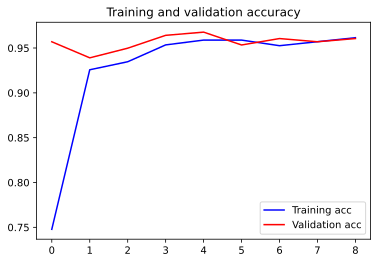

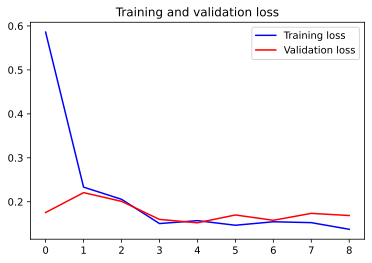

9/9 [==============================] - 12s 1s/step - loss: 0.1402 - accuracy: 0.9606


In [ ]:
VALIDATION_ACCURACY = [] # список для результатов обучения на фолдах
VALIDATION_LOSS = [] # список для результатов обучения на фолдах

save_dir = '/content/gdrive/My Drive/sf-dl-car-classification/train1/' # куда сохраняем веса
fold_var = 1 # счетчик фолдов

for train_index, val_index in kf.split(np.zeros(1397),Y):
	training_data = train1.iloc[train_index] # получаем индексы тренировочной выборки
	validation_data = train1.iloc[val_index] # индексы валидационной выборки

	
	'''train_data_generator = train_gen.flow_from_directory('/content/gdrive/My Drive/sf-dl-car-classification/train1/train', 
                                            class_mode='categorical', 
                                            batch_size=BATCH_SIZE, 
                                            target_size=(312, 312),
                                            shuffle=True,
                                            subset='training'
                                           )

	valid_data_generator = train_gen.flow_from_directory('/content/gdrive/My Drive/sf-dl-car-classification/train1/train', 
                                             class_mode='categorical', 
                                             batch_size=BATCH_SIZE, 
                                             target_size=(312, 312),
                                             shuffle=True,
                                             subset='validation'
                                            )'''
	train_data_generator = idg.flow_from_dataframe(training_data, directory = '/content/gdrive/My Drive/sf-dl-car-classification/train1/Photos',
						       x_col = 'Id', y_col = 'Category',
						       class_mode = "categorical", shuffle = True, target_size=(312, 312))
	valid_data_generator  = idg.flow_from_dataframe(validation_data, directory = '/content/gdrive/My Drive/sf-dl-car-classification/train1/Photos',
							x_col = "Id", y_col = "Category",
							class_mode = "categorical", shuffle = True, target_size=(312, 312))
	
	# голова модели
	
	model=Model.Sequential()
	model.add(base_model)
	model.add(Layer.GlobalAveragePooling2D())
	model.add(Layer.Dense(512, 
                      activation='relu'))


	#model.add(Layer.BatchNormalization())
	model.add(Layer.Dropout(0.4))
	model.add(Layer.Dense(CLASS_NUM, activation='softmax'))
 
	# собираем модель
	model.compile(loss='categorical_crossentropy',
		      optimizer=optimizers.Adam(learning_rate=0.00001),
		      metrics=['accuracy'])
	
	# определяем CALLBACKS
	checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='max') # сохраняет веса
	ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=2, min_lr=0.000001, verbose=1) # снижает lr при снижении метрики
	EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4) # останавливает обучение при постоянном снижении показателя метрики
	callbacks_list = [checkpoint, ReduceLROnPlateau, EarlyStopping]
	

	# обучение
	history = model.fit(train_data_generator,
			    epochs=30,
			    callbacks=callbacks_list,
			    validation_data=valid_data_generator)
 
	# графическое изображение процесса обучения
	acc = history.history['accuracy']
	val_acc = history.history['val_accuracy']
	loss = history.history['loss']
	val_loss = history.history['val_loss']
 
	epochs = range(len(acc))
 
	plt.plot(epochs, acc, 'b', label='Training acc')
	plt.plot(epochs, val_acc, 'r', label='Validation acc')
	plt.title('Training and validation accuracy')
	plt.legend()
 
	plt.figure()
 
	plt.plot(epochs, loss, 'b', label='Training loss')
	plt.plot(epochs, val_loss, 'r', label='Validation loss')
	plt.title('Training and validation loss')
	plt.legend()
 
	plt.show()
	
	# оценка производительности модели
	model.load_weights(save_dir+get_model_name(fold_var))
	
	results = model.evaluate(valid_data_generator)
	results = dict(zip(model.metrics_names,results))
	
	VALIDATION_ACCURACY.append(results['accuracy'])
	VALIDATION_LOSS.append(results['loss'])
	
	tf.keras.backend.clear_session()
	
	fold_var += 1

In [ ]:
pd.DataFrame(VALIDATION_ACCURACY).mean() # усредненное значение метрики по фолдам

0    0.943477
dtype: float64

In [ ]:
results

{'accuracy': 0.9605734944343567, 'loss': 0.14023195207118988}

В итоге удалось достичь точности 95,07 %. В целом, учитывая, что стиль дизайна помещений не имеет догматов, наверное не так уж и плохо.  

# 2. Перенос стиля изображений.

Для реализации процесса переноса стиля изображения был использован материал по ссылке https://colab.research.google.com/github/tensorflow/models/blob/master/research/nst_blogpost/4_Neural_Style_Transfer_with_Eager_Execution.ipynb#scrollTo=eqxUicSPUOP6. Перенос стиля изображений будет осуществляться с помощью сети VGG19.

In [ ]:
tf.executing_eagerly()

True

In [ ]:
tf.executing_eagerly()
print("Eager execution: {}".format(tf.executing_eagerly()))

Eager execution: True


In [ ]:
'''# Set up some global values here
content_path = '/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/photos/file_18.jpg'
style_path = '/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/loft/лофт.jpg' 
'''

"# Set up some global values here\ncontent_path = '/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/photos/file_18.jpg'\nstyle_path = '/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/loft/лофт.jpg' \n"

In [ ]:
# Определение функции для загрузки изображения и ограничения его максимального размера до 512 пикселей
def load_img(path_to_img):
  max_dim = 512
  img = Image.open(path_to_img)
  long = max(img.size)
  scale = max_dim/long
  img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), Image.ANTIALIAS)
  
  img = kp_image.img_to_array(img)
  
  # Нам нужно подготовить массив изображений таким образом, чтобы он имел размер batch  
  img = np.expand_dims(img, axis=0)
  return img

In [ ]:
# функция для отображения изображения
def imshow(img, title=None):
  # Remove the batch dimension
  out = np.squeeze(img, axis=0)
  # Normalize for display 
  out = out.astype('uint8')
  plt.imshow(out)
  if title is not None:
    plt.title(title)
  plt.imshow(out)

In [ ]:
# функция которая позволяет перевести формат изображения из RGB в BGR, затем каждый цветовой канал центрируется 

def load_and_process_img(path_to_img):
  img = load_img(path_to_img)
  img = tf.keras.applications.vgg19.preprocess_input(img)
  return img

In [ ]:


def deprocess_img(processed_img):
  x = processed_img.copy()
  if len(x.shape) == 4:
    x = np.squeeze(x, 0)
  assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                             "dimension [1, height, width, channel] or [height, width, channel]")
  if len(x.shape) != 3:
    raise ValueError("Invalid input to deprocessing image")
  
  # perform the inverse of the preprocessing step
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1]

  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [ ]:
# Content layer where will pull our feature maps
content_layers = ['block5_conv2'] 

# Style layer we are interested in
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1'
               ]

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [ ]:
def get_model():
  """ Creates our model with access to intermediate layers. 
  
  This function will load the VGG19 model and access the intermediate layers. 
  These layers will then be used to create a new model that will take input image
  and return the outputs from these intermediate layers from the VGG model. 
  
  Returns:
    returns a keras model that takes image inputs and outputs the style and 
      content intermediate layers. 
  """
  # Load our model. We load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  # Get output layers corresponding to style and content layers 
  style_outputs = [vgg.get_layer(name).output for name in style_layers]
  content_outputs = [vgg.get_layer(name).output for name in content_layers]
  model_outputs = style_outputs + content_outputs
  # Build model 
  return models.Model(vgg.input, model_outputs)

In [ ]:
def get_content_loss(base_content, target):
  return tf.reduce_mean(tf.square(base_content - target))

In [ ]:
def gram_matrix(input_tensor):
  # We make the image channels first 
  channels = int(input_tensor.shape[-1])
  a = tf.reshape(input_tensor, [-1, channels])
  n = tf.shape(a)[0]
  gram = tf.matmul(a, a, transpose_a=True)
  return gram / tf.cast(n, tf.float32)

def get_style_loss(base_style, gram_target):
  """Expects two images of dimension h, w, c"""
  # height, width, num filters of each layer
  # We scale the loss at a given layer by the size of the feature map and the number of filters
  height, width, channels = base_style.get_shape().as_list()
  gram_style = gram_matrix(base_style)
  
  return tf.reduce_mean(tf.square(gram_style - gram_target))# / (4. * (channels ** 2) * (width * height) ** 2)

In [ ]:
def get_feature_representations(model, content_path, style_path):
  """Helper function to compute our content and style feature representations.

  This function will simply load and preprocess both the content and style 
  images from their path. Then it will feed them through the network to obtain
  the outputs of the intermediate layers. 
  
  Arguments:
    model: The model that we are using.
    content_path: The path to the content image.
    style_path: The path to the style image
    
  Returns:
    returns the style features and the content features. 
  """
  # Load our images in 
  content_image = load_and_process_img(content_path)
  style_image = load_and_process_img(style_path)
  
  # batch compute content and style features
  style_outputs = model(style_image)
  content_outputs = model(content_image)
  
  
  # Get the style and content feature representations from our model  
  style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
  content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
  return style_features, content_features

In [ ]:
def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
  """This function will compute the loss total loss.
  
  Arguments:
    model: The model that will give us access to the intermediate layers
    loss_weights: The weights of each contribution of each loss function. 
      (style weight, content weight, and total variation weight)
    init_image: Our initial base image. This image is what we are updating with 
      our optimization process. We apply the gradients wrt the loss we are 
      calculating to this image.
    gram_style_features: Precomputed gram matrices corresponding to the 
      defined style layers of interest.
    content_features: Precomputed outputs from defined content layers of 
      interest.
      
  Returns:
    returns the total loss, style loss, content loss, and total variational loss
  """
  style_weight, content_weight = loss_weights
  
  # Feed our init image through our model. This will give us the content and 
  # style representations at our desired layers. Since we're using eager
  # our model is callable just like any other function!
  model_outputs = model(init_image)
  
  style_output_features = model_outputs[:num_style_layers]
  content_output_features = model_outputs[num_style_layers:]
  
  style_score = 0
  content_score = 0

  # Accumulate style losses from all layers
  # Here, we equally weight each contribution of each loss layer
  weight_per_style_layer = 1.0 / float(num_style_layers)
  for target_style, comb_style in zip(gram_style_features, style_output_features):
    style_score += weight_per_style_layer * get_style_loss(comb_style[0], target_style)
    
  # Accumulate content losses from all layers 
  weight_per_content_layer = 1.0 / float(num_content_layers)
  for target_content, comb_content in zip(content_features, content_output_features):
    content_score += weight_per_content_layer* get_content_loss(comb_content[0], target_content)
  
  style_score *= style_weight
  content_score *= content_weight

  # Get total loss
  loss = style_score + content_score 
  return loss, style_score, content_score

In [ ]:
def compute_grads(cfg):
  with tf.GradientTape() as tape: 
    all_loss = compute_loss(**cfg)
  # Compute gradients wrt input image
  total_loss = all_loss[0]
  return tape.gradient(total_loss, cfg['init_image']), all_loss

In [ ]:
import IPython.display

def run_style_transfer(content_path, 
                       style_path,
                       num_iterations=1000,
                       content_weight=1e3, 
                       style_weight=1e-2): 
  # We don't need to (or want to) train any layers of our model, so we set their
  # trainable to false. 
  model = get_model() 
  for layer in model.layers:
    layer.trainable = False
  
  # Get the style and content feature representations (from our specified intermediate layers) 
  style_features, content_features = get_feature_representations(model, content_path, style_path)
  gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]
  
  # Set initial image
  init_image = load_and_process_img(content_path)
  init_image = tf.Variable(init_image, dtype=tf.float32)
  # Create our optimizer
  opt = tf.optimizers.Adam(learning_rate=5,  epsilon=1e-1)

  # For displaying intermediate images 
  iter_count = 1
  
  # Store our best result
  best_loss, best_img = float('inf'), None
  
  # Create a nice config 
  loss_weights = (style_weight, content_weight)
  cfg = {
      'model': model,
      'loss_weights': loss_weights,
      'init_image': init_image,
      'gram_style_features': gram_style_features,
      'content_features': content_features
  }
    
  # For displaying
  num_rows = 2
  num_cols = 5
  display_interval = num_iterations/(num_rows*num_cols)
  start_time = time.time()
  global_start = time.time()
  
  norm_means = np.array([103.939, 116.779, 123.68])
  min_vals = -norm_means
  max_vals = 255 - norm_means   
  
  imgs = []
  for i in range(num_iterations):
    grads, all_loss = compute_grads(cfg)
    loss, style_score, content_score = all_loss
    opt.apply_gradients([(grads, init_image)])
    clipped = tf.clip_by_value(init_image, min_vals, max_vals)
    init_image.assign(clipped)
    end_time = time.time() 
    
    if loss < best_loss:
      # Update best loss and best image from total loss. 
      best_loss = loss
      best_img = deprocess_img(init_image.numpy())

    if i % display_interval== 0:
      start_time = time.time()
      
      # Use the .numpy() method to get the concrete numpy array
      plot_img = init_image.numpy()
      plot_img = deprocess_img(plot_img)
      imgs.append(plot_img)
      IPython.display.clear_output(wait=True)
      IPython.display.display_png(Image.fromarray(plot_img))
      print('Iteration: {}'.format(i))        
      print('Total loss: {:.4e}, ' 
            'style loss: {:.4e}, '
            'content loss: {:.4e}, '
            'time: {:.4f}s'.format(loss, style_score, content_score, time.time() - start_time))
  print('Total time: {:.4f}s'.format(time.time() - global_start))
  IPython.display.clear_output(wait=True)
  plt.figure(figsize=(14,4))
  for i,img in enumerate(imgs):
      plt.subplot(num_rows,num_cols,i+1)
      plt.imshow(img)
      plt.xticks([])
      plt.yticks([])
      
  return best_img, best_loss 

# Непосредственно создание бота

In [ ]:
bot = telebot.TeleBot("1821875701:AAGzepDno-JAgwhJIYv_BYLNfgn4TcI5KyY", parse_mode=None) # token

In [ ]:
@bot.message_handler(commands=['start', 'help'])
def send_welcome(message):
    bot.reply_to(message, "Опять ты? Чего тебе еще? Хочешь, чтобы я посмотрел на очередные работы бездарностей?")

In [ ]:
count = 0
#content_path = '/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/photos/file_7.jpg'
#style_path = '/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/loft/лофт.jpg'

In [ ]:
# Handles all sent documents and audio files
style = []
@bot.message_handler(content_types=['photo', 'text'])
def handle_photo_text(message):
    
    if message.text == "Да":
        bot.send_message(message.from_user.id, "Давай уже присылай свое барахло. Не тяни!")
    elif message.text == "/help":
        bot.send_message(message.from_user.id, "Напиши 'да'")
    elif message.text == "Нет":
        bot.send_message(message.from_user.id, "Ходят тут всякие...")
    
    elif message.photo:
      
      
        
      try:
            
          file_info = bot.get_file(message.photo[len(message.photo)-1].file_id)
          downloaded_file = bot.download_file(file_info.file_path)

          #src='C:/Users/Красницкий/моя_папка/дипломный_проект/'+file_info.file_path;
          src='/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/'+file_info.file_path;
            
            
            

          with open(src, 'wb') as new_file:
              new_file.write(downloaded_file)
            
            
           
          
          number_of_filename = str()
          for i in src.replace('/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/photos/',''):
            # isdigit проверяет символ, является ли он цифрой
            if i.isdigit():
              number_of_filename += i
          number_of_filename = int(number_of_filename)


          
          if number_of_filename % 2 != 0:
            bot.reply_to(message,"Ага, вижу это порождение безвкусицы... Но, пожалуй, сохраню это")

            sample_submission = pd.DataFrame({'Id':src, 'Category':0}, index=[0])
            sample_submission['Id'] = sample_submission['Id'].replace('/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/photos/','')

                        

            test_gen = ImageDataGenerator(rescale=1./255)
            PATH1 = '/content/gdrive/My Drive/sf-dl-car-classification/test1'
            test_sub_generator = test_gen.flow_from_dataframe(dataframe=sample_submission,
                                                            directory='/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/photos',
                                                            x_col="Id",
                                                            y_col=None,
                                                            shuffle=False,
                                                            class_mode=None,
                                                            target_size=(IMG_SIZE, IMG_SIZE),
                                                            batch_size=BATCH_SIZE)
            
                
            test_sub_generator.reset()
            predictions = model.predict(test_sub_generator, 
                                    steps=len(test_sub_generator), 
                                    verbose=1) 
            predictions = np.argmax(predictions, axis=-1) #multiple categories


            result = []
            stile_dict = {0:'эклектика', 1 : 'лофт', 2 : 'скандинавский'}
          # находим массив ключей с совпадающим значением
            for i in range(0, len (predictions)):
              for key, value in stile_dict.items(): 
                if key == predictions[i]:
                  result.append(stile_dict[predictions[i]])


            style.append(result[0])
            bot.reply_to(message,"Полагаю, что ты предпочитаешь дизайн помещений в стиле " + result[0])

            if result[0] == 'эклектика':
              bot.reply_to(message,"статья на тему 'особенности стиля эклектика'")
              bot.reply_to(message,"На-ка посмотри как нормальные люди делают http://unix-studio.ru/projects")
              bot.reply_to(message,"Теперь пришли фото помещения которое необходимо преобразовать")
                     
            if result[0] == 'лофт':
              bot.reply_to(message,"статья на тему 'особенности стиля лофт'")
              bot.reply_to(message,"На-ка посмотри как нормальные люди делают http://unix-studio.ru/projects")
              bot.reply_to(message,"Теперь пришли фото помещения которое необходимо преобразовать")


            if result[0] == 'скандинавский':
              bot.reply_to(message,"статья на тему 'особенности скандинавского стиля'")
              bot.reply_to(message,"На-ка посмотри как нормальные люди делают http://unix-studio.ru/projects")
              bot.reply_to(message,"Теперь пришли фото помещения которое необходимо преобразовать")

          elif number_of_filename % 2 == 0:
            bot.reply_to(message,"Да уж... Это займет какое-то время")
            content_path = src
            
            if style[-1] == 'лофт': 
              style_path = '/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/styles/лофт.jpg'
              best, best_loss = run_style_transfer(content_path, 
                                      style_path, num_iterations=500)  
              image = cv2.cvtColor(np.array(Image.fromarray(best)), cv2.COLOR_BGR2RGB)
              cv2.imwrite('/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/итог/image.jpg' , image)
      
              bot.reply_to(message, "https://drive.google.com/drive/folders/1WXvdUN1hwLbepGPrm1RLzIBdwdF6l3oI?usp=sharing")

            if style[-1] == 'скандинавский':
              style_path = '/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/styles/сканди.jpg'
              best, best_loss = run_style_transfer(content_path, 
                                      style_path, num_iterations=500)  
              image = cv2.cvtColor(np.array(Image.fromarray(best)), cv2.COLOR_BGR2RGB)
              cv2.imwrite('/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/итог/image.jpg' , image)
      
              bot.reply_to(message, "https://drive.google.com/drive/folders/1WXvdUN1hwLbepGPrm1RLzIBdwdF6l3oI?usp=sharing")
            
            if style[-1] == 'эклектика':
              style_path = '/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/styles/эклектика.jpg'
              best, best_loss = run_style_transfer(content_path, 
                                      style_path, num_iterations=500)  
              image = cv2.cvtColor(np.array(Image.fromarray(best)), cv2.COLOR_BGR2RGB)
              cv2.imwrite('/content/gdrive/My Drive/sf-dl-car-classification/test1/test_upload/итог/image.jpg' , image)
      
              bot.reply_to(message, "https://drive.google.com/drive/folders/1WXvdUN1hwLbepGPrm1RLzIBdwdF6l3oI?usp=sharing")



           
         
      except Exception as e:
        bot.reply_to(message,e )
    


    
    else:
        bot.send_message(message.from_user.id, "Бред какой-то. Напиши /help.")
    

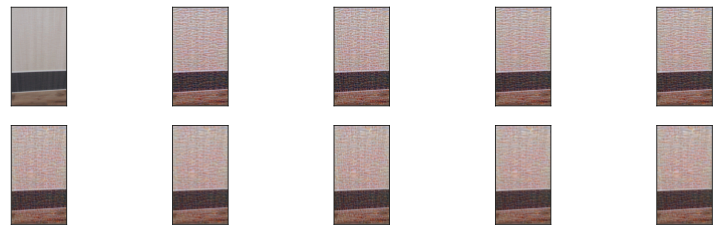

In [ ]:
bot.polling()

# Выводы

В рамках реализации проекта были применены полученные за время обучения навыки и знания в части: 
- парсинга интернет страниц;
- аугментации изображений (были применены различные вариации путем перебора);
- генерации данных данных для нейросети;
- transfer learning и Fine tuning;
- чтобы убедиться, что модель может хорошо работать с данными на которых она не обучалась, использована кросс-валидация.
Дополнительно изучены отдельные вопросы связанные с организацией доступа в Google-диск из ноутбука в Google-Colabratory, переносом стиля изображения создания чат-ботов.

Получены следующие результаты:

- обучен классификатор стилей дизайна помещений (распознает три класса) с показателем метрики accuracy - 95,07 %. 
С полученным в ходе реализации проекта опытом можно с увереностью сказать, что стиль "эклектика" был выбран зря. Это объясняется, во-первых, тем, что он не очень то и популярен (это говорит о востребованности бизнесом решения данной задачи), а, во-вторых, тем, что основным отличительными чертами этого стиля в большей степени являются предметы интерьера а не материалы отделки, таким образом перенос стиля "эклектика" значительно сложнее.

- создан чат-бот с заявленным функционалом, однако, фактически выдаваемый им результат не может применяться на практике. Как видится, здесь есть определенный потенциал для дальнейшего изучения проблемы и усовершенствования алгоритма. Так для того, чтобы нужный стиль переносился на фотографию помещения заказчика необходимо обучить нейросеть распознавать стены, пол, мебель и т.д. К сожалению, в рамках реализации дипломного проекта времени на изучения процесса детектирования этих объектов на изображениях не осталось.
